Implémentation de résolution numérique approchée de l'équation 1 :
$\frac{dy}{dx} = f(x,y), 
y(a) = A$
à l'aide de la résolution du système linéaire correspondant à l'annulation des dérivées partielles de la fonction d'erreur

In [436]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, matmul
from numpy.linalg import inv, det

Paramètres du modèle

In [437]:
#nombre de coefficients de Fourier ajustables
M = 10
# nombre de points pour la variable indépendante
N = 100
#liste des points de test
X = linspace(0,1,N)

Matrice représentant le système linéaire

In [438]:
mat = zeros((M,M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        mat[m-1,l-1] = m*l*dot(cos(2*pi*m*X), cos(2*pi*l*X))
mat *= 2*pi
print(det(mat))

1.3405669415499926e+38


Vecteur b

In [439]:
b = zeros(M)
for l in range(1,M+1) :
    b[l-1] = -l*dot(cos(2*pi*X), cos(2*pi*l*X))


Résolution du système

In [440]:
mat_inv = inv(mat)
A = matmul(mat_inv,b)

Résultats obtenus :

In [441]:
print("Coefficients trouvés :",A)

Coefficients trouvés : [-1.59154943e-01  4.74338450e-19  1.08420217e-19  2.71050543e-20
  2.74438675e-19  1.05032085e-19  9.82558219e-20  5.92923063e-20
  5.42101086e-20  5.42101086e-20]


Tracé de l'erreur absolue en échelle log

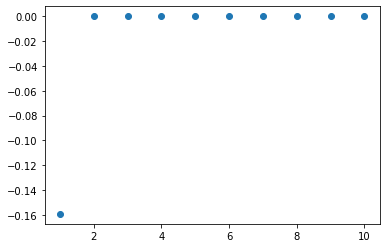

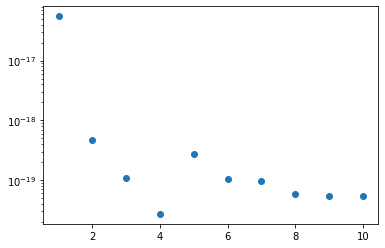

In [442]:
from matplotlib.pyplot import scatter, show, yscale, savefig

#erreur relative sur le premier coefficient
#valeurs théoriques :
A_th = zeros((M))
A_th[0] = -1/(2*pi)

erreur = abs(A-A_th)

scatter(range(1, M+1), A)
savefig('coefs_1_inv.jpg')
show()

scatter(range(1, M+1), erreur)
yscale('log')
savefig('coefs_1_inv_erreur.jpg')
show()
